In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

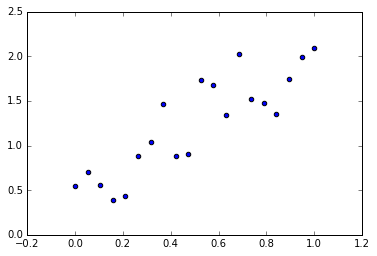

In [281]:
x = np.linspace(0,1,num=20)

f = lambda x: 1.5*x + np.random.uniform(0,1)
y = map(f,x)

dat = np.array(zip(x,y))
plt.scatter(dat[:,0],dat[:,1])

In [282]:
class PCA():
    def fit(self,data):
        data = np.expand_dims(data, axis=-1)
        sigm = np.mean(map(lambda x: np.dot(x,x.T), data),axis=0)
        self.U = np.linalg.svd(sigm)[0]
        
    def project(self,data,n_dims=1):
        U_red = self.U[:,:n_dims]
        return np.dot( U_red.T, data )
    
    def recover(self,projected,n_dims=1):
        U_red = self.U[:,:n_dims]
        return np.dot(U_red,projected).T

        

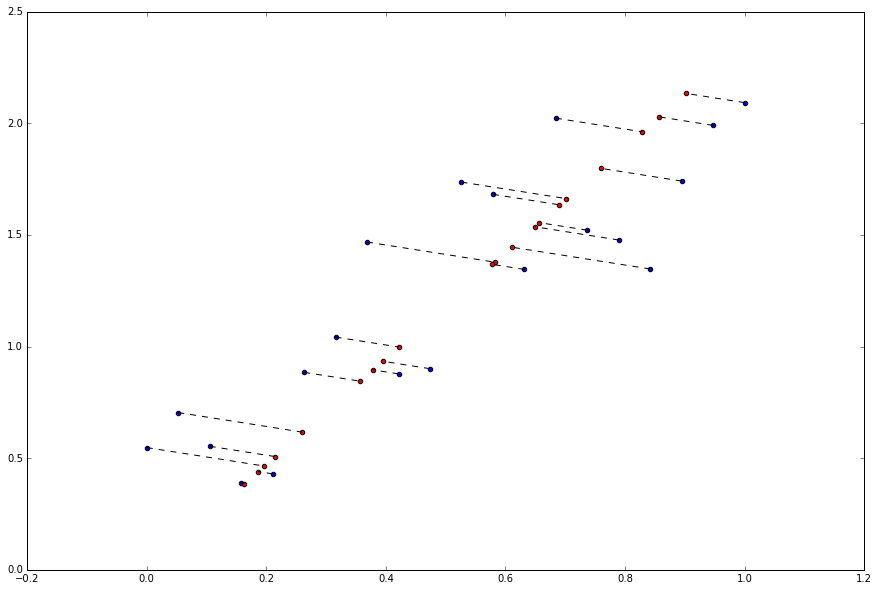

In [283]:
a = PCA()
a.fit(dat)

proj = a.project(dat.T)

rec = a.recover(proj)

plt.figure(figsize=(15,10))
plt.scatter(dat[:,0],dat[:,1])
plt.scatter(rec[:,0],rec[:,1],c='r')

for i in range(dat.shape[0]):
    plt.plot([dat[i,0],rec[i,0]],[dat[i,1],rec[i,1]], 'k--')